In [1]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

from protein_dataset import ProteinDataset
import constants as CONSTANTS
from models.basic_vae_1 import BasicVAE1
from models.vae_loss import VAELoss


%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = BasicVAE1()
model.to(device)
criterion = VAELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
batch_size = 3
n_epochs = 5
print_every = 1
test_every = 1
plot_every = 1

In [3]:
train_dataset = ProteinDataset(CONSTANTS.TRAIN_FILE)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
print(train_dataset.__len__())
x, y = train_dataset.__getitem__(0)
print(x.shape, y.shape)
len(train_loader)

3t47A: 1-hot size: torch.Size([71, 20]) contact-map size: torch.Size([71, 71])
5m1pA: 1-hot size: torch.Size([187, 20]) contact-map size: torch.Size([187, 187])
3h6rA: 1-hot size: torch.Size([152, 20]) contact-map size: torch.Size([152, 152])
4lx3A: 1-hot size: torch.Size([98, 20]) contact-map size: torch.Size([98, 98])
4eiuA: 1-hot size: torch.Size([238, 20]) contact-map size: torch.Size([238, 238])
5lwaA: 1-hot size: torch.Size([148, 20]) contact-map size: torch.Size([148, 148])
1050
torch.Size([1, 20, 64]) torch.Size([32, 32])


350

In [4]:
val_dataset = ProteinDataset(CONSTANTS.VAL_FILE)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
print(len(val_loader))

3l1nA: 1-hot size: torch.Size([152, 20]) contact-map size: torch.Size([152, 152])
1ihjA: 1-hot size: torch.Size([94, 20]) contact-map size: torch.Size([94, 94])
65


In [5]:
test_dataset = ProteinDataset(CONSTANTS.TEST_FILE)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
print(len(test_loader))

5fv6A: 1-hot size: torch.Size([168, 20]) contact-map size: torch.Size([168, 168])
5sy8O: 1-hot size: torch.Size([155, 20]) contact-map size: torch.Size([155, 155])
122


In [17]:
def train():
    model.train()
    loss = 0.0
    losses = []
    n_train = len(train_loader)
    for i, (x, y) in enumerate(train_loader):
        x, y = x.to(device), y.to(device)
#         print("x:", x.shape, "y:", y.shape)
        optimizer.zero_grad()
        y_prime, mu, logvar = model(x)
        # y_prime.squeeze_(0)
#         print("y_prime:", y_prime.size(), "y:", y.size())
        loss = criterion(y, y_prime, mu, logvar)
        # print(loss)
        loss.backward()
        optimizer.step()
        losses.append(loss)
        if i != 0 and i % 20 == 0:
            print("training {}/{} th batch | loss: {:.5f}".format(i, n_train, loss.item()))
    return torch.stack(losses).mean().item()
        

In [18]:
train()

training 20/350 th batch | loss: 738.40961
training 40/350 th batch | loss: 1514.11975
training 60/350 th batch | loss: 891.15027
training 80/350 th batch | loss: 902.41107
training 100/350 th batch | loss: 1398.98804
training 120/350 th batch | loss: 1934.84229
training 140/350 th batch | loss: 1170.19409
training 160/350 th batch | loss: 772.98529
training 180/350 th batch | loss: 346.36389
training 200/350 th batch | loss: 840.66211
training 220/350 th batch | loss: 1323.32751
training 240/350 th batch | loss: 592.86096
training 260/350 th batch | loss: 634.13037
training 280/350 th batch | loss: 1665.09412
training 300/350 th batch | loss: 1274.25403
training 320/350 th batch | loss: 1789.02026
training 340/350 th batch | loss: 1844.22192


1354.26171875

In [19]:
def test(data_loader):
    model.eval()
    loss = 0.0
    losses = []
    n_test = len(data_loader)
    for i, (x, y) in enumerate(data_loader):
        x, y = x.to(device), y.to(device)
        y_prime, mu, logvar = model(x)
        loss = criterion(y, y_prime, mu, logvar)
        losses.append(loss)
        if i != 0 and i % 20 == 0:
            print("testing {}/{} th batch | loss: {:.5f}".format(i, n_test, loss.item()))
    return torch.stack(losses).mean().item()

Starting epoch 1/6
training 20/350 th batch | loss: 759.95294
training 40/350 th batch | loss: 1513.78503
training 60/350 th batch | loss: 899.70898
training 80/350 th batch | loss: 900.35449
training 100/350 th batch | loss: 1392.16064
training 120/350 th batch | loss: 1933.22510
training 140/350 th batch | loss: 1178.62854
training 160/350 th batch | loss: 782.98016
training 180/350 th batch | loss: 333.92911
training 200/350 th batch | loss: 833.68536
training 220/350 th batch | loss: 1315.63428
training 240/350 th batch | loss: 582.23535
training 260/350 th batch | loss: 639.71240
training 280/350 th batch | loss: 1654.26868
training 300/350 th batch | loss: 1270.30859
training 320/350 th batch | loss: 1778.84460
training 340/350 th batch | loss: 1847.84924
epoch:1/6, train_loss: 1351.84277
testing 20/65 th batch | loss: 1376.84387
testing 40/65 th batch | loss: 1249.75916
testing 60/65 th batch | loss: 1160.00769
epoch:1/6, val_loss: 1410.68127
Updating best test loss: 1410.68127


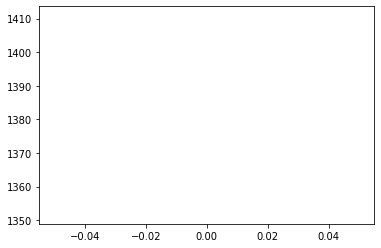

Starting epoch 2/6
training 20/350 th batch | loss: 770.41266
training 40/350 th batch | loss: 1515.60596
training 60/350 th batch | loss: 907.03198
training 80/350 th batch | loss: 899.62628
training 100/350 th batch | loss: 1398.73926
training 120/350 th batch | loss: 1936.28137
training 140/350 th batch | loss: 1168.99109
training 160/350 th batch | loss: 780.52710
training 180/350 th batch | loss: 336.06415
training 200/350 th batch | loss: 833.56018
training 220/350 th batch | loss: 1300.97449
training 240/350 th batch | loss: 576.11652
training 260/350 th batch | loss: 631.90448
training 280/350 th batch | loss: 1665.58044
training 300/350 th batch | loss: 1268.27515
training 320/350 th batch | loss: 1783.56958
training 340/350 th batch | loss: 1838.73755
epoch:2/6, train_loss: 1350.67786
testing 20/65 th batch | loss: 2033.13770
testing 40/65 th batch | loss: 1896.87671
testing 60/65 th batch | loss: 1885.20239
epoch:2/6, val_loss: 1411.31274


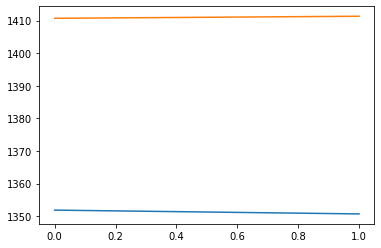

Starting epoch 3/6
training 20/350 th batch | loss: 770.33612
training 40/350 th batch | loss: 1508.87598
training 60/350 th batch | loss: 902.72961
training 80/350 th batch | loss: 897.94598
training 100/350 th batch | loss: 1389.33826
training 120/350 th batch | loss: 1918.54358
training 140/350 th batch | loss: 1169.82874
training 160/350 th batch | loss: 788.24847
training 180/350 th batch | loss: 337.47797
training 200/350 th batch | loss: 832.49701
training 220/350 th batch | loss: 1306.24109
training 240/350 th batch | loss: 581.32336
training 260/350 th batch | loss: 642.75580
training 280/350 th batch | loss: 1660.20862
training 300/350 th batch | loss: 1266.98364
training 320/350 th batch | loss: 1780.02454
training 340/350 th batch | loss: 1846.34204
epoch:3/6, train_loss: 1349.84119
testing 20/65 th batch | loss: 1860.80359
testing 40/65 th batch | loss: 1301.79041
testing 60/65 th batch | loss: 1421.97876
epoch:3/6, val_loss: 1410.13525
Updating best test loss: 1410.13525


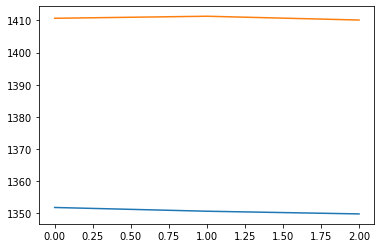

Starting epoch 4/6
training 20/350 th batch | loss: 778.82947
training 40/350 th batch | loss: 1504.56958
training 60/350 th batch | loss: 898.95459
training 80/350 th batch | loss: 896.64380
training 100/350 th batch | loss: 1389.95996
training 120/350 th batch | loss: 1922.66199


In [ ]:
train_losses = []
val_losses = []
best_test_loss = np.inf
for epoch in range(1, n_epochs+1):
    print("Starting epoch {}/{}".format(epoch, n_epochs+1))
    
    train_loss = train()
    train_losses.append(train_loss)
    
    if epoch % print_every == 0:
        print("epoch:{}/{}, train_loss: {:.5f}".format(epoch, n_epochs+1, train_loss))
    
    if epoch % test_every == 0:
        val_loss = test(val_loader)
        print("epoch:{}/{}, val_loss: {:.5f}".format(epoch, n_epochs+1, val_loss))
        val_losses.append(val_loss)
        if val_loss < best_test_loss:
            best_test_loss = val_loss
            print('Updating best test loss: {:.5f}'.format(best_test_loss))
            torch.save(model.state_dict(),'../outputs/best_model.pth')
    
    if epoch % plot_every == 0:
        plt.plot(train_losses)
        plt.plot(val_losses)
        plt.show()

In [11]:
test_loss = test(test_loader)
test_loss

1478.68994140625